# COMP 472 - Mini Project 1

### Import all necessary libraries

- gzip, json - Initial file parsing
- nltk - Word tokenization
- pandas - Data exploration
- numpy - Math
- matplotlib - Data exploration
- gensim - Load in pre-trained word2vec models
- sklearn - ML algorithms

In [1]:
# All imports 
import gzip
import json
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

## 1. Dataset Preparation & Analysis

### 1.2 - Load dataset

Here we will be extracting and reading the JSON file into a Pandas DataFrame. We decided to use `pd.read_json()` rather than `json.load()` since DataFrames give us a more pleasant data type to work with.

In [2]:
# Read JSON file into Pandas DataFrame
f = gzip.open('goemotions.json.gz', 'rb')
df = pd.read_json(f)
df.columns = ['comment', 'emotion', 'sentiment']

# Close file
f.close()

Calling `DataFrame.head()` gives us a nice visual of our data.

In [3]:
df.head(10)

,comment,emotion,sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive
5,"He isn't as big, but he's still quite popular....",disapproval,negative
6,That's crazy; I went to a super [RELIGION] hig...,amusement,positive
7,that's adorable asf,amusement,positive
8,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",amusement,positive
9,"I have, and now that you mention it, I think t...",neutral,neutral


### 1.3 - Plotting data

Here we will be using matplotlib to visualize and explore our data. 

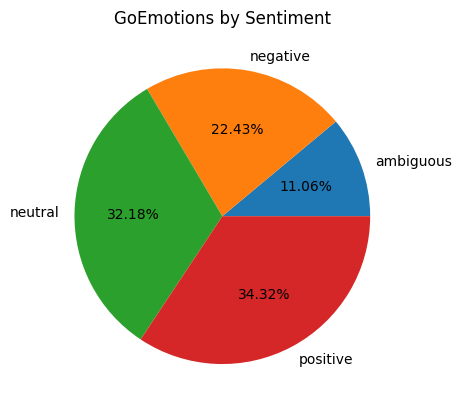

In [4]:
# Group sentiments by value and count
sentiment = df.groupby(['sentiment'])['sentiment'].count()

# Plot as pie chart
plt.title('GoEmotions by Sentiment')
plt.pie(sentiment, labels = sentiment.index, autopct = '%1.2f%%')

plt.savefig('sentiments.pdf')
plt.show()

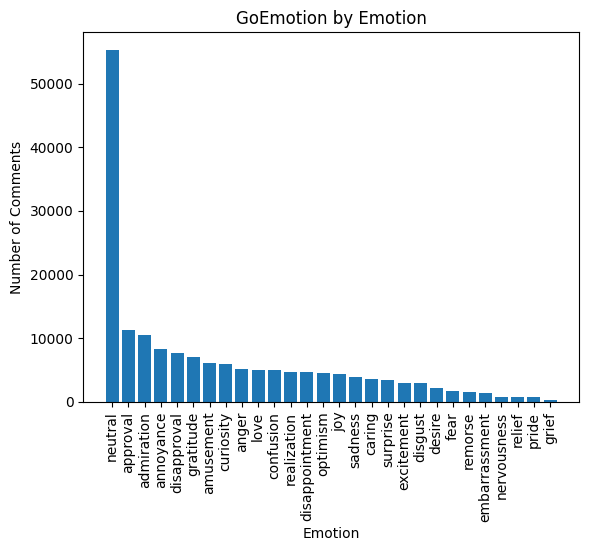

In [5]:
# Group emotions by value and count, sort descending
emotion = df.groupby(['emotion'])['emotion'].count().sort_values(ascending=False)

# Plot as bar graph
plt.bar(emotion.index, emotion)
plt.xticks(
    rotation=90, 
    fontweight='light',
)

plt.title('GoEmotion by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')

plt.savefig('emotions.pdf', bbox_inches='tight')
plt.show()

## 2. Words as Features

In [6]:
vectorizer = CountVectorizer()

comment_vector = vectorizer.fit_transform(df['comment'])
print(type(comment_vector))

<class 'scipy.sparse._csr.csr_matrix'>


In [7]:
vocab_size = comment_vector.shape[1]
print("Vocabulary size: " + str(vocab_size))

Vocabulary size: 30449


In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(comment_vector, df, test_size=0.2)

### Multinomial Naive-Bayes

In [9]:
# Emotion classifier
nb_classifier = MultinomialNB()
nb_emotion_model = nb_classifier.fit(X_train, y_train['emotion'])

In [10]:
v = vectorizer.transform(['Thank you!'])
nb_emotion_model.predict(v)

array(['gratitude'], dtype='<U14')

In [11]:
#Sentiment classifier
nb_sentiment_model = nb_classifier.fit(X_train, y_train['sentiment'])
v = vectorizer.transform(['Thank you!'])
nb_sentiment_model.predict(v)

array(['positive'], dtype='<U9')

In [12]:
print (nb_emotion_model.predict(X_test))
print("emotion score: ", nb_emotion_model.score(X_test, y_test['emotion']))

print (nb_sentiment_model.predict(X_test))
print("sentiment score: ",nb_sentiment_model.score(X_test, y_test['sentiment']))

['positive' 'neutral' 'neutral' ... 'positive' 'neutral' 'neutral']
emotion score:  0.16095332324525666
['positive' 'neutral' 'neutral' ... 'positive' 'neutral' 'neutral']
sentiment score:  0.5458037481084856


### Decision Tree

In [13]:
from sklearn import tree
from sklearn import preprocessing

#Emotion classifier
dtc_emotion_model = tree.DecisionTreeClassifier(criterion="entropy")
dtc_emotion_model.fit(X_train, y_train['emotion'])


#predictEmotionFromDT = dtc_emotion_model.predict(x_test[0:5])
#print(x_test[0:5])
#print(predictEmotionFromDT)

DecisionTreeClassifier(criterion='entropy')

In [14]:
#Sentiment classifier
dtc_sentiment_model = tree.DecisionTreeClassifier(criterion="entropy")
dtc_sentiment_model.fit(X_train, y_train['sentiment'])
#predictSentimentFromDT = dtc_sentiment_model.predict(x_test[0:5])
#print(predictSentimentFromDT)

DecisionTreeClassifier(criterion='entropy')

In [15]:
print (dtc_emotion_model.predict(X_test))
print("emotion score: ", dtc_emotion_model.score(X_test, y_test['emotion']))

print (dtc_sentiment_model.predict(X_test))
print("sentiment score: ",dtc_sentiment_model.score(X_test, y_test['sentiment']))

['joy' 'approval' 'neutral' ... 'love' 'neutral' 'neutral']
emotion score:  0.35842742404842276
['positive' 'positive' 'neutral' ... 'positive' 'neutral' 'neutral']
sentiment score:  0.5456291467815155


### Multi-Layered Perceptron

In [16]:
from sklearn.neural_network import MLPClassifier

# Multi-Layered Perceptron classifier for emotion classification
mlpcClassifierEmotion = MLPClassifier(max_iter=50)
mlpcClassifierEmotion.fit(X_train, y_train['emotion'])
#may or may not converge - > think about why? 

# Multi-Layered Perceptron classifier for sentiment classification
mlpcClassifierSentiment = MLPClassifier(max_iter=50)
mlpcClassifierSentiment.fit(X_train, y_train['sentiment'])
# mlpcClassifierEmotion.predict(x_test)
# mlpcClassifierEmotion.score(x_test, y_test['emotion'])
#may need to pay attention to warnings -> model hasnt been optimized 

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=50)

In [17]:
print (mlpcClassifierEmotion.predict(X_test))
print("emotion score: ", mlpcClassifierEmotion.score(X_test, y_test['emotion']))

print (mlpcClassifierSentiment.predict(X_test))
print("sentiment score: ",mlpcClassifierSentiment.score(X_test, y_test['sentiment']))

['joy' 'approval' 'neutral' ... 'love' 'neutral' 'neutral']
emotion score:  0.38330811314165986
['positive' 'positive' 'neutral' ... 'positive' 'neutral' 'neutral']
sentiment score:  0.5549121173320917


### Top MNB

In [18]:
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()

# parameters
param = {'alpha': [0, 0.5, 1, 2]} #mention in analysis 

# Top Multinomial Naive bayes classifier for emotion classification
topMNBEmotion = GridSearchCV(mnb, param)
topMNBEmotion.fit(X_train, y_train['emotion'])
print("best estimator for emotion classification: ", topMNBEmotion.best_estimator_)

# Top Multinomial Naive bayes classifier for Sentiment classification
topMNBSentiment = GridSearchCV(mnb, param)
topMNBSentiment.fit(X_train, y_train['sentiment'])
print("best estimator for sentiment classification: ", topMNBSentiment.best_estimator_)


C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

best estimator for emotion classification:  MultinomialNB(alpha=0.5)


C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

best estimator for sentiment classification:  MultinomialNB(alpha=1)


### Top DT

In [19]:
dt = tree.DecisionTreeClassifier()

# parameters
param = {'criterion': ['entropy', 'gini'], 'max_depth': [3, 8], 'min_samples_split': [3,5]}
#if its less than 3, dont split 
#depth of 3, depth of 8
# Top DT classifier for emotion classification
topDTEmotion = GridSearchCV(dt, param)
topDTEmotion.fit(X_train, y_train['emotion'])
print("best estimator for emotion classification: ", topDTEmotion.best_estimator_)

# Top DT classifier for Sentiment classification
topDTSentiment = GridSearchCV(dt, param)
topDTSentiment.fit(X_train, y_train['sentiment'])
print("best estimator for sentiment classification: ", topDTSentiment.best_estimator_)

best estimator for emotion classification:  DecisionTreeClassifier(max_depth=8, min_samples_split=5)
best estimator for sentiment classification:  DecisionTreeClassifier(max_depth=8, min_samples_split=5)


### Top MLP

In [20]:
mlp = MLPClassifier()

# parameters
param = {'activation': ['sigmoid', 'tanh', 'relu', 'identity'], 'hidden_layer_sizes': [(30, 50), (10, 10, 10)], 'solver': ['adam', 'sgd'], 'max_iter': [5]}

# Top MLP classifier for emotion classification
topMLPEmotion = GridSearchCV(mlp, param)
topMLPEmotion.fit(X_train, y_train['emotion'])
print("best estimator for emotion classification: ", topMLPEmotion.best_estimator_)

# Top MLP classifier for Sentiment classification
topMLPSentiment = GridSearchCV(mlp, param)
topMLPSentiment.fit(X_train, y_train['sentiment'])
print("best estimator for sentiment classification: ", topMLPSentiment.best_estimator_)

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


best estimator for emotion classification:  MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10, 10), max_iter=5)


C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization

best estimator for sentiment classification:  MLPClassifier(hidden_layer_sizes=(30, 50), max_iter=5)


C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


### Performance

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

performanceFile = open("performance.txt", "w")

Multinomial Naive Bayes

In [22]:
performanceFile.write("Multiomial Naive Bayes classifier for 'emotion'\n\n")

#Performance of emotion classifier
nb_emotion_model_prediction = nb_emotion_model.predict(X_test)
mnb_emotion_report = classification_report(y_test['emotion'], nb_emotion_model_prediction)
performanceFile.write(mnb_emotion_report)
#print(mnb_emotion_report)

# Confusion matrix
mnb_emotion_confusion_matrix = confusion_matrix(y_test['emotion'], nb_emotion_model_prediction)
performanceFile.write(str(mnb_emotion_confusion_matrix))
#print(mnb_emotion_confusion_matrix)

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

5022

In [23]:
performanceFile.write("Multiomial Naive Bayes classifier for 'sentiment'\n\n")

#Performance of sentiment classifier
nb_sentiment_model_prediction = nb_sentiment_model.predict(X_test)
mnb_sentiment_report = classification_report(y_test['sentiment'], nb_sentiment_model_prediction)
performanceFile.write(mnb_sentiment_report)
#print(mnb_sentiment_report)
# Confusion matrix
mnb_sentiment_confusion_matrix = confusion_matrix(y_test['sentiment'], nb_sentiment_model_prediction)
performanceFile.write(str(mnb_sentiment_confusion_matrix))
#print(mnb_sentiment_confusion_matrix)

92

Decision Tree

In [24]:
performanceFile.write("Decision Tree classifier for 'emotion'\n\n")

#Performance of emotion classifier

DT_emotion_model_prediction = dtc_emotion_model.predict(X_test)
DT_emotion_report = classification_report(y_test['emotion'], DT_emotion_model_prediction)
performanceFile.write(DT_emotion_report)

#Confusion matrix
DT_emotion_confusion_matrix = confusion_matrix(y_test['emotion'], DT_emotion_model_prediction)
performanceFile.write(str(DT_emotion_confusion_matrix))


4060

In [25]:
performanceFile.write("Decision Tree classifier for 'sentiment'\n\n")

#Performance of sentiment classifier

DT_sentiment_model_prediction = dtc_sentiment_model.predict(X_test)
DT_sentiment_report = classification_report(y_test['sentiment'], DT_sentiment_model_prediction)
performanceFile.write(DT_sentiment_report)

#Confusion matrix
DT_sentiment_confusion_matrix = confusion_matrix(y_test['sentiment'], DT_sentiment_model_prediction)
performanceFile.write(str(DT_sentiment_confusion_matrix))

92

Multi-Layered Perceptron

In [26]:
performanceFile.write("Multi-layered Perceptron classifier for 'emotion'\n\n")

#Performance of emotion classifier
print(classification_report(y_test['emotion'], mlpcClassifierEmotion.predict(X_test)))
performanceFile.write(classification_report(y_test['emotion'], mlpcClassifierEmotion.predict(X_test)))

#Confusion matrix
print(confusion_matrix(y_test['emotion'], mlpcClassifierEmotion.predict(X_test)))
performanceFile.write(str(confusion_matrix(y_test['emotion'], mlpcClassifierEmotion.predict(X_test))))

performanceFile.write("\n\nMulti-layered Perceptron classifier for 'sentiment'\n\n")

#Performance of sentiment classifier
print(classification_report(y_test['sentiment'], mlpcClassifierSentiment.predict(X_test)))
performanceFile.write(classification_report(y_test['sentiment'], mlpcClassifierSentiment.predict(X_test)))

#Confusion matrix
print(confusion_matrix(y_test['sentiment'], mlpcClassifierSentiment.predict(X_test)))
performanceFile.write(str(confusion_matrix(y_test['sentiment'], mlpcClassifierSentiment.predict(X_test))))

                precision    recall  f1-score   support

    admiration       0.45      0.54      0.49      2059
     amusement       0.48      0.52      0.50      1192
         anger       0.29      0.28      0.29      1068
     annoyance       0.17      0.19      0.18      1653
      approval       0.23      0.18      0.20      2232
        caring       0.26      0.23      0.24       694
     confusion       0.24      0.24      0.24       939
     curiosity       0.35      0.30      0.33      1171
        desire       0.29      0.27      0.28       448
disappointment       0.15      0.16      0.16       966
   disapproval       0.23      0.25      0.24      1523
       disgust       0.21      0.25      0.23       562
 embarrassment       0.19      0.16      0.17       296
    excitement       0.25      0.20      0.22       598
          fear       0.39      0.37      0.38       355
     gratitude       0.72      0.75      0.73      1419
         grief       0.12      0.15      0.13  

92

TOP-MNB

In [27]:
performanceFile.write("Top-MNB classifier for 'emotion'\n\n")

#Performance of emotion classifier
print(classification_report(y_test['emotion'], topMNBEmotion.predict(X_test)))
performanceFile.write(classification_report(y_test['emotion'], topMNBEmotion.predict(X_test)))

#Confusion matrix
print(confusion_matrix(y_test['emotion'], topMNBEmotion.predict(X_test)))
performanceFile.write(str(confusion_matrix(y_test['emotion'], topMNBEmotion.predict(X_test))))

performanceFile.write("\n\nTop-MNB classifier for 'sentiment'\n\n")

#Performance of sentiment classifier
print(classification_report(y_test['sentiment'], topMNBSentiment.predict(X_test)))
performanceFile.write(classification_report(y_test['sentiment'], topMNBSentiment.predict(X_test)))

#Confusion matrix
print(confusion_matrix(y_test['sentiment'], topMNBSentiment.predict(X_test)))
performanceFile.write(str(confusion_matrix(y_test['sentiment'], topMNBSentiment.predict(X_test))))

                precision    recall  f1-score   support

    admiration       0.45      0.51      0.48      2059
     amusement       0.50      0.44      0.47      1192
         anger       0.34      0.20      0.25      1068
     annoyance       0.19      0.11      0.14      1653
      approval       0.23      0.13      0.17      2232
        caring       0.25      0.16      0.20       694
     confusion       0.26      0.13      0.17       939
     curiosity       0.36      0.19      0.25      1171
        desire       0.35      0.10      0.15       448
disappointment       0.21      0.08      0.12       966
   disapproval       0.23      0.13      0.17      1523
       disgust       0.31      0.14      0.19       562
 embarrassment       0.42      0.04      0.08       296
    excitement       0.26      0.08      0.12       598
          fear       0.32      0.09      0.14       355
     gratitude       0.71      0.73      0.72      1419
         grief       0.00      0.00      0.00  

92

Top-DT

In [28]:
performanceFile.write("Top-DT classifier for 'emotion'\n\n")

#Performance of emotion classifier
print(classification_report(y_test['emotion'], topDTEmotion.predict(X_test)))
performanceFile.write(classification_report(y_test['emotion'], topDTEmotion.predict(X_test)))

#Confusion matrix
print(confusion_matrix(y_test['emotion'], topDTEmotion.predict(X_test)))
performanceFile.write(str(confusion_matrix(y_test['emotion'], topDTEmotion.predict(X_test))))

performanceFile.write("\n\nTop-DT classifier for 'sentiment'\n\n")

#Performance of sentiment classifier
print(classification_report(y_test['sentiment'], topDTSentiment.predict(X_test)))
performanceFile.write(classification_report(y_test['sentiment'], topDTSentiment.predict(X_test)))

#Confusion matrix
print(confusion_matrix(y_test['sentiment'], topDTSentiment.predict(X_test)))
performanceFile.write(str(confusion_matrix(y_test['sentiment'], topDTSentiment.predict(X_test))))

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                precision    recall  f1-score   support

    admiration       0.32      0.22      0.26      2059
     amusement       0.57      0.34      0.42      1192
         anger       0.00      0.00      0.00      1068
     annoyance       0.00      0.00      0.00      1653
      approval       0.00      0.00      0.00      2232
        caring       0.33      0.00      0.01       694
     confusion       0.00      0.00      0.00       939
     curiosity       0.00      0.00      0.00      1171
        desire       0.00      0.00      0.00       448
disappointment       0.00      0.00      0.00       966
   disapproval       0.00      0.00      0.00      1523
       disgust       1.00      0.00      0.00       562
 embarrassment       0.00      0.00      0.00       296
    excitement       0.00      0.00      0.00       598
          fear       0.00      0.00      0.00       355
     gratitude       0.90      0.71      0.80      1419
         grief       0.00      0.00      0.00  

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[[  461     9     0     0     0     0     0     0     0     0     0     0
      0     0     0    11     0     1    74     0  1493     9     0     0
      0     1     0     0]
 [   29   400     0     0     0     0     2     0     0     0     0     0
      0     0     0     4     0     0    10     0   735     5     0     0
      0     7     0     0]
 [   24     4     0     0     0     0     0     0     0     0     0     0
      0     0     0     2     0     0     8     0  1019     4     0     0
      0     7     0     0]
 [   29    20     0     0     0     0     0     0     0     0     0     0
      0     0     0    12     0     0    17     0  1563     4     0     0
      0     8     0     0]
 [  114    13     0     0     0     0     0     0     0     0     0     0
      0     0     0     7     0     0    38     0  2038    15     0     0
      0     7     0     0]
 [   40     4     0     0     0     2     0     0     0     0     0     0
      0     0     0     2     0     0    18     0  

108

Top-MLP

In [29]:
performanceFile.write("Top-MLP classifier for 'emotion'\n\n")

#Performance of emotion classifier
print(classification_report(y_test['emotion'], topMLPEmotion.predict(X_test)))
performanceFile.write(classification_report(y_test['emotion'], topMLPEmotion.predict(X_test)))

#Confusion matrix
print(confusion_matrix(y_test['emotion'], topMLPEmotion.predict(X_test)))
performanceFile.write(str(confusion_matrix(y_test['emotion'], topMLPEmotion.predict(X_test))))

performanceFile.write("\n\nTop-MLP classifier for 'sentiment'\n\n")

#Performance of sentiment classifier
print(classification_report(y_test['sentiment'], topMLPSentiment.predict(X_test)))
performanceFile.write(classification_report(y_test['sentiment'], topMLPSentiment.predict(X_test)))

#Confusion matrix
print(confusion_matrix(y_test['sentiment'], topMLPSentiment.predict(X_test)))
performanceFile.write(str(confusion_matrix(y_test['sentiment'], topMLPSentiment.predict(X_test))))

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                precision    recall  f1-score   support

    admiration       0.47      0.56      0.51      2059
     amusement       0.49      0.62      0.54      1192
         anger       0.30      0.30      0.30      1068
     annoyance       0.19      0.06      0.09      1653
      approval       0.20      0.02      0.03      2232
        caring       0.28      0.08      0.12       694
     confusion       0.27      0.08      0.12       939
     curiosity       0.35      0.22      0.27      1171
        desire       0.31      0.17      0.22       448
disappointment       0.11      0.01      0.02       966
   disapproval       0.09      0.01      0.02      1523
       disgust       0.24      0.15      0.19       562
 embarrassment       0.00      0.00      0.00       296
    excitement       0.35      0.01      0.02       598
          fear       0.29      0.41      0.34       355
     gratitude       0.73      0.77      0.75      1419
         grief       0.00      0.00      0.00  

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[[1154   27   16    5   17    4    2    4    4    0    0    5    0    1
     6   59    0   48  101    0  548   21    0    0    0    0   13   24]
 [  40  735    5   10    2    0    0   10    2    0    2    5    0    0
     2    3    0   23   12    0  310    4    0    0    0    0    8   19]
 [  25   17  317   59    2    2    3    5    2    1    4   25    0    0
    14    3    0    3    7    0  554    0    0    0    0    5   14    6]
 [  36   68  168   94    5    6   11   24    4    6    9   32    0    0
    28   15    0    4   17    0 1055    8    0    0    0    3   46   14]
 [ 154   45   24   17   41   17    9   14   10    7   10    8    0    1
    19   25    0   18   54    0 1665   47    0    0    0    7   33    7]
 [  33    8   14    3    7   56    1    5   14    1    5    1    0    0
    15   26    0   10   13    0  421   34    0    0    0    8   17    2]
 [  14   18    8    3    2    0   71   85    1    0    8    5    0    0
    14    2    0    3    5    0  675    7    0    0    0  

92

In [30]:
performanceFile.close()

## Exploration: different splits of training & test sets

Multinomial Naive Bayes

In [31]:
#50% train, 50% test
nb_xTrain, nb_xtest, nb_yTrain, nb_yTest = train_test_split(comment_vector, df, test_size=0.5)

#Emotion classifier
nb_emotion_model2 = nb_classifier.fit(nb_xTrain, nb_yTrain['emotion'])

#Sentiment classifier
nb_sentiment_model2 =  nb_classifier.fit(nb_xTrain, nb_yTrain['sentiment'])

#Showing performance with different training and testing set
nb_emotion_model_prediction2 = nb_emotion_model2.predict(nb_xtest)

nb_emotion_report2 = classification_report(nb_yTrain['emotion'], nb_emotion_model_prediction2)
print(nb_emotion_report2)
nb_emotion_confusion_matrix2=confusion_matrix(nb_yTest['emotion'], nb_emotion_model_prediction2)
print(nb_emotion_confusion_matrix2)

nb_sentiment_model_prediction2 = nb_sentiment_model2.predict(nb_xtest)

nb_sentiment_report2 = classification_report(nb_yTrain['sentiment'], nb_sentiment_model_prediction2)
print(nb_sentiment_report2)
nb_sentiment_confusion_matrix2=confusion_matrix(nb_yTest['sentiment'], nb_sentiment_model_prediction2)
print(nb_sentiment_confusion_matrix2)

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00      5320
     ambiguous       0.00      0.00      0.00         0
     amusement       0.00      0.00      0.00      3019
         anger       0.00      0.00      0.00      2585
     annoyance       0.00      0.00      0.00      4103
      approval       0.00      0.00      0.00      5699
        caring       0.00      0.00      0.00      1787
     confusion       0.00      0.00      0.00      2473
     curiosity       0.00      0.00      0.00      2936
        desire       0.00      0.00      0.00      1102
disappointment       0.00      0.00      0.00      2341
   disapproval       0.00      0.00      0.00      3848
       disgust       0.00      0.00      0.00      1436
 embarrassment       0.00      0.00      0.00       694
    excitement       0.00      0.00      0.00      1474
          fear       0.00      0.00      0.00       915
     gratitude       0.00      0.00      0.00  

Decision Trees

In [32]:
#50% train, 50% test
DT_xTrain, DT_xtest, DT_yTrain, DT_yTest = train_test_split(comment_vector, df, test_size=0.5)

#Emotion classifier
dtc_emotion_model2 = tree.DecisionTreeClassifier(criterion = "entropy")
dtc_emotion_model2.fit(DT_xTrain, DT_yTrain['emotion'])


#Sentiment classifier
dtc_sentiment_model2 = tree.DecisionTreeClassifier(criterion = "entropy")
dtc_sentiment_model2.fit(DT_xTrain, DT_yTrain['sentiment'])

#Showing performance with different training and testing set
dtc_emotion_model_prediction2 = dtc_emotion_model2.predict(DT_xtest)

dtc_emotion_report2 = classification_report(DT_yTrain['emotion'], dtc_emotion_model_prediction2)
print(dtc_emotion_report2)
dtc_emotion_confusion_matrix2=confusion_matrix(DT_yTest['emotion'], dtc_emotion_model_prediction2)
print(dtc_emotion_confusion_matrix2)

dtc_sentiment_model_prediction2 = dtc_sentiment_model2.predict(DT_xtest)

dtc_sentiment_report2 = classification_report(DT_yTrain['sentiment'], dtc_sentiment_model_prediction2)
print(dtc_sentiment_report2)
dtc_sentiment_confusion_matrix2=confusion_matrix(DT_yTest['sentiment'], dtc_sentiment_model_prediction2)
print(dtc_sentiment_confusion_matrix2)

                precision    recall  f1-score   support

    admiration       0.06      0.08      0.07      5321
     amusement       0.03      0.04      0.04      3071
         anger       0.03      0.04      0.04      2586
     annoyance       0.05      0.06      0.05      4178
      approval       0.06      0.08      0.07      5625
        caring       0.02      0.03      0.02      1789
     confusion       0.02      0.03      0.02      2491
     curiosity       0.03      0.04      0.04      2909
        desire       0.02      0.02      0.02      1088
disappointment       0.03      0.03      0.03      2348
   disapproval       0.05      0.05      0.05      3864
       disgust       0.01      0.01      0.01      1458
 embarrassment       0.01      0.01      0.01       731
    excitement       0.02      0.02      0.02      1490
          fear       0.01      0.01      0.01       886
     gratitude       0.04      0.04      0.04      3510
         grief       0.00      0.00      0.00  

Multi-Layered Perceptron

In [33]:
#50% train, 50% test
mlp_xTrain, mlp_xtest, mlp_yTrain, mlp_yTest = train_test_split(comment_vector, df, test_size=0.5)

#Emotion classifier
mlp_emotion_model2 = MLPClassifier(max_iter=50)
mlp_emotion_model2.fit(mlp_xTrain, mlp_yTrain['emotion'])


#Sentiment classifier
mlp_sentiment_model2 = MLPClassifier(max_iter=50)
mlp_sentiment_model2.fit(mlp_xTrain, mlp_yTrain['sentiment'])

#Showing performance with different training and testing set
mlp_emotion_model_prediction2 = mlp_emotion_model2.predict(mlp_xtest)

mlp_emotion_report2 = classification_report(mlp_yTrain['emotion'], mlp_emotion_model_prediction2)
print(mlp_emotion_report2)
mlp_emotion_confusion_matrix2=confusion_matrix(mlp_yTest['emotion'], mlp_emotion_model_prediction2)
print(mlp_emotion_confusion_matrix2)

mlp_sentiment_model_prediction2 = mlp_sentiment_model2.predict(mlp_xtest)

mlp_sentiment_report2 = classification_report(mlp_yTrain['sentiment'], mlp_sentiment_model_prediction2)
print(dtc_sentiment_report2)
mlp_sentiment_confusion_matrix2=confusion_matrix(mlp_yTest['sentiment'], mlp_sentiment_model_prediction2)
print(mlp_sentiment_confusion_matrix2)

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


                precision    recall  f1-score   support

    admiration       0.07      0.07      0.07      5180
     amusement       0.04      0.04      0.04      3054
         anger       0.03      0.02      0.03      2624
     annoyance       0.04      0.04      0.04      4169
      approval       0.07      0.05      0.06      5660
        caring       0.01      0.01      0.01      1758
     confusion       0.03      0.02      0.03      2476
     curiosity       0.04      0.03      0.04      2916
        desire       0.02      0.02      0.02      1095
disappointment       0.03      0.03      0.03      2303
   disapproval       0.05      0.04      0.04      3822
       disgust       0.02      0.02      0.02      1449
 embarrassment       0.00      0.00      0.00       700
    excitement       0.02      0.02      0.02      1541
          fear       0.01      0.01      0.01       827
     gratitude       0.04      0.04      0.04      3509
         grief       0.00      0.00      0.00  

Top - Multinomial Naive Bayes

In [34]:
#50% train, 50% test
tmnb_xTrain, tmnb_xtest, tmnb_yTrain, tmnb_yTest = train_test_split(comment_vector, df, test_size=0.5)


mnb = MultinomialNB()

# parameters
param = {'alpha': [0, 0.5, 1, 2]} 

#Emotion classifier
tmnb_emotion_model2 = GridSearchCV(mnb, param)
tmnb_emotion_model2.fit(tmnb_xTrain, tmnb_yTrain['emotion'])


#Sentiment classifier
tmnb_sentiment_model2 = GridSearchCV(mnb, param)
tmnb_sentiment_model2.fit(tmnb_xTrain, tmnb_yTrain['sentiment'])



#Showing performance with different training and testing set
tmnb_emotion_model_prediction2 = tmnb_emotion_model2.predict(tmnb_xtest)

tmnb_emotion_report2 = classification_report(tmnb_yTrain['emotion'], tmnb_emotion_model_prediction2)
print(tmnb_emotion_report2)
tmnb_emotion_confusion_matrix2=confusion_matrix(tmnb_yTest['emotion'], tmnb_emotion_model_prediction2)
print(tmnb_emotion_confusion_matrix2)

tmnb_sentiment_model_prediction2 = tmnb_sentiment_model2.predict(tmnb_xtest)

tmnb_sentiment_report2 = classification_report(tmnb_yTrain['sentiment'], tmnb_sentiment_model_prediction2)
print(tmnb_sentiment_report2)
tmnb_sentiment_confusion_matrix2=confusion_matrix(tmnb_yTest['sentiment'], tmnb_sentiment_model_prediction2)
print(tmnb_sentiment_confusion_matrix2)


#best estimator
print("best estimator for emotion classification: ",tmnb_emotion_model2.best_estimator_)
print("best estimator for sentiment classification: ", tmnb_sentiment_model2.best_estimator_)

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

                precision    recall  f1-score   support

    admiration       0.06      0.06      0.06      5292
     amusement       0.03      0.02      0.03      3036
         anger       0.03      0.01      0.02      2634
     annoyance       0.05      0.03      0.03      4108
      approval       0.06      0.03      0.04      5601
        caring       0.03      0.01      0.01      1765
     confusion       0.04      0.01      0.02      2439
     curiosity       0.03      0.01      0.02      2883
        desire       0.01      0.00      0.00      1079
disappointment       0.03      0.01      0.01      2326
   disapproval       0.04      0.02      0.02      3827
       disgust       0.01      0.00      0.00      1454
 embarrassment       0.02      0.00      0.00       712
    excitement       0.02      0.00      0.01      1546
          fear       0.00      0.00      0.00       902
     gratitude       0.04      0.04      0.04      3540
         grief       0.00      0.00      0.00  

Top - Decision Tree

In [35]:
#50% train, 50% test
tdt_xTrain, tdt_xtest, tdt_yTrain, tdt_yTest = train_test_split(comment_vector, df, test_size=0.5)

dt=tree.DecisionTreeClassifier()

# parameters
param = {'criterion': ['entropy', 'gini'], 'max_depth': [3, 8], 'min_samples_split': [3,5]}

#Emotion classifier
tdt_emotion_model2 = GridSearchCV(dt, param)
tdt_emotion_model2.fit(tdt_xTrain, tdt_yTrain['emotion'])


#Sentiment classifier
tdt_sentiment_model2 = GridSearchCV(dt, param)
tdt_sentiment_model2.fit(tdt_xTrain, tdt_yTrain['sentiment'])

#could over fit if the training data is small

#Showing performance with different training and testing set
tdt_emotion_model_prediction2 = tdt_emotion_model2.predict(tdt_xtest)

tdt_emotion_report2 = classification_report(tdt_yTrain['emotion'], tdt_emotion_model_prediction2)
print(tdt_emotion_report2)
tdt_emotion_confusion_matrix2=confusion_matrix(tdt_yTest['emotion'], tdt_emotion_model_prediction2)
print(tdt_emotion_confusion_matrix2)

tdt_sentiment_model_prediction2 = tdt_sentiment_model2.predict(tdt_xtest)

tdt_sentiment_report2 = classification_report(tdt_yTrain['sentiment'], tdt_sentiment_model_prediction2)
print(tdt_sentiment_report2)
tdt_sentiment_confusion_matrix2=confusion_matrix(tdt_yTest['sentiment'], tdt_sentiment_model_prediction2)
print(tdt_sentiment_confusion_matrix2)

#best estimator
print("best estimator for emotion classification: ",tdt_emotion_model2.best_estimator_)
print("best estimator for sentiment classification: ", tdt_sentiment_model2.best_estimator_)

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                precision    recall  f1-score   support

    admiration       0.05      0.01      0.02      5265
     amusement       0.04      0.02      0.03      3027
         anger       0.00      0.00      0.00      2605
     annoyance       0.00      0.00      0.00      4116
      approval       0.00      0.00      0.00      5648
        caring       0.03      0.00      0.00      1699
     confusion       0.00      0.00      0.00      2523
     curiosity       0.00      0.00      0.00      2946
        desire       0.00      0.00      0.00      1096
disappointment       0.00      0.00      0.00      2324
   disapproval       0.09      0.00      0.00      3832
       disgust       0.00      0.00      0.00      1454
 embarrassment       0.00      0.00      0.00       716
    excitement       0.00      0.00      0.00      1520
          fear       0.00      0.00      0.00       925
     gratitude       0.04      0.03      0.03      3472
         grief       0.00      0.00      0.00  

Top - MLP

In [36]:
#50% train, 50% test
tmlp_xTrain, tmlp_xtest, tmlp_yTrain, tmlp_yTest = train_test_split(comment_vector, df, test_size=0.5)

mlp = MLPClassifier()
param = {'activation': ['sigmoid', 'tanh', 'relu', 'identity'], 'hidden_layer_sizes': [(30, 50), (10, 10, 10)], 'solver': ['adam', 'sgd'], 'max_iter': [5]}

#Emotion classifier
tmlp_emotion_model2 = GridSearchCV(mlp, param)
tmlp_emotion_model2.fit(tmlp_xTrain, tmlp_yTrain['emotion'])


#Sentiment classifier
tmlp_sentiment_model2 = GridSearchCV(mlp, param)
tmlp_sentiment_model2.fit(tmlp_xTrain, tmlp_yTrain['sentiment'])


#Showing performance with different training and testing set
tmlp_emotion_model_prediction2 = tmlp_emotion_model2.predict(tmlp_xtest)

tmlp_emotion_report2 = classification_report(tmlp_yTrain['emotion'], tmlp_emotion_model_prediction2)
print(tmlp_emotion_report2)
tmlp_emotion_confusion_matrix2=confusion_matrix(tmlp_yTest['emotion'], tmlp_emotion_model_prediction2)
print(tmlp_emotion_confusion_matrix2)

tmlp_sentiment_model_prediction2 = tmlp_sentiment_model2.predict(tmlp_xtest)

tmlp_sentiment_report2 = classification_report(tmlp_yTrain['sentiment'], tmlp_sentiment_model_prediction2)
print(tmlp_sentiment_report2)
tmlp_sentiment_confusion_matrix2=confusion_matrix(tmlp_yTest['sentiment'], tmlp_sentiment_model_prediction2)
print(tmlp_sentiment_confusion_matrix2)

#best estimator
print("best estimator for emotion classification: ",tmlp_emotion_model2.best_estimator_)
print("best estimator for sentiment classification: ", tmlp_sentiment_model2.best_estimator_)

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Pytho

                precision    recall  f1-score   support

    admiration       0.06      0.06      0.06      5318
     amusement       0.04      0.04      0.04      3102
         anger       0.02      0.02      0.02      2564
     annoyance       0.04      0.03      0.03      4193
      approval       0.06      0.05      0.05      5623
        caring       0.02      0.01      0.01      1724
     confusion       0.03      0.01      0.02      2420
     curiosity       0.04      0.03      0.03      2932
        desire       0.01      0.01      0.01      1098
disappointment       0.04      0.02      0.03      2330
   disapproval       0.04      0.03      0.04      3816
       disgust       0.01      0.01      0.01      1448
 embarrassment       0.01      0.00      0.00       668
    excitement       0.02      0.01      0.01      1566
          fear       0.01      0.01      0.01       890
     gratitude       0.04      0.04      0.04      3561
         grief       0.00      0.00      0.00  

## 3. Embeddings as Features

### 3.1 - Load word2vec model

We will be downloading the `word2vec-google-news-300` model using Gensim.

In [ ]:
word2vec_model = api.load("word2vec-google-news-300")

### 3.2 - Tokenize data

Install required NLTK data and tokenize sentences into individual words.

In [ ]:
# Uncomment when running for the first time
# nltk.download('popular')

tokenized_comments = df['comment'].apply(nltk.word_tokenize)
tokens = np.concatenate(tokenized_comments.to_numpy())
unique_tokens_count = len(np.unique(tokens))
print('Number of unique tokens in dataset: ' + str(unique_tokens_count))

### 3.3 - Calculate sentence vector (by taking average of word vectors)

Here I have created two functions. The first function calculates the average vector of a sentence by averaging its individual word vectors. The second function calls the first function for a collection of sentences and returns an array containing each average vector.

In [ ]:
# Get average of single sentence
def get_avg_vector(sentence, model, vector_size):
    words = [word for word in sentence if word in model]
    if len(words) >= 1:
        return np.mean(model[words], axis=0)
    else:
        return np.zeros(vector_size) # Set length of vector to 0 for all dimensions

# Get averages of collection of sentences
def get_avg_vectors(tokenized, model, vector_size):
    avg_vectors = []
    for comment in tokenized:
        avg_vectors.append(get_avg_vector(comment, model, vector_size))
    return avg_vectors

# Get average vector
avg_word2vec = get_avg_vectors(tokenized_comments, word2vec_model, 300)

### 3.4 - Compute and display overall hit rate

The overall hit rate is calculated by counting the number of zero vectors and dividing it by the total amount of vectors in the dataset.

In [ ]:
def count_hit_rate(tokens, model):
    count = 0
    for token in tokens:
        if token in model:
            count += 1
    return count / len(tokens)

hit_rate = count_hit_rate(tokens, word2vec_model)
print("Hit rate for dataset: " + str(hit_rate))

### 3.5 - Train base MLP models

In [ ]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(avg_word2vec, df, test_size=0.2)

In [ ]:
mlp_emotion = MLPClassifier(max_iter=10)
mlp_emotion.fit(X_train_w2v, y_train_w2v['emotion'])

In [ ]:
mlp_sentiment = MLPClassifier(max_iter=10)
mlp_sentiment.fit(X_train_w2v, y_train_w2v['sentiment'])

### 3.6 - Train "Top" MLP models

For this question, we are allowed to choose whichever hyper-parameters we would like. I chose to try adding another hidden layer to see how it would affect our results compared to the base MLP models.

In [ ]:
top_mlp_emotion = MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100))
top_mlp_emotion.fit(X_train_w2v, y_train_w2v['emotion'])

In [ ]:
top_mlp_sentiment = MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100))
top_mlp_sentiment.fit(X_train_w2v, y_train_w2v['sentiment'])

### 3.7 - Classification report

Here we will simply be calling the `classification_report()` function and piping the output to a file called `performance.txt`.

Note: if UndefinedMetricWarning shows, it simply means that our model never predicts certain labels (eg. may never predict a post as being labelled 'grief'. This can usually be fixed by increasing the number of iterations.)

In [ ]:
y_pred_emotion = mlp_emotion.predict(X_test_w2v)
y_pred_sentiment = mlp_sentiment.predict(X_test_w2v)
y_pred_top_emotion = top_mlp_emotion.predict(X_test_w2v)
y_pred_top_sentiment = top_mlp_sentiment.predict(X_test_w2v)

with open('performance.txt', 'w') as f:
    f.write('Base-MLP emotion classifier\n\n')
    f.write(classification_report(y_pred_emotion, y_test_w2v['emotion']))
    f.write('\n\n')

    f.write('Base-MLP sentiment classifier\n\n')
    f.write(classification_report(y_pred_sentiment, y_test_w2v['sentiment']))
    f.write('\n\n')

    f.write('Top-MLP emotion classifier\n\n')
    f.write(classification_report(y_pred_top_emotion, y_test_w2v['emotion']))
    f.write('\n\n')

    f.write('Top-MLP sentiment classifier\n\n')
    f.write(classification_report(y_pred_top_sentiment, y_test_w2v['sentiment']))
    f.write('\n\n')

### 3.8 - Two other pretrained embedding models

Load two pretrained models using gensim.

In [ ]:
# Load models
glove_twitter_model = api.load('glove-twitter-200')
glove_wiki_model = api.load('glove-wiki-gigaword-300')

Get average vectors with new model and split data.

In [ ]:
# Twitter
avg_tw = get_avg_vectors(tokenized_comments, glove_twitter_model, 200)
X_train_tw, X_test_tw, y_train_tw, y_test_tw = train_test_split(avg_tw, df, test_size=0.2)

# Wiki
avg_wiki = get_avg_vectors(tokenized_comments, glove_wiki_model, 300)
X_train_wiki, X_test_wiki, y_train_wiki, y_test_wiki = train_test_split(avg_wiki, df, test_size=0.2)

We will now train our models using the new embedding models.

In [ ]:
mlp_twitter_emotion = MLPClassifier(max_iter=10)
mlp_twitter_emotion.fit(X_train_tw, y_train_tw['emotion'])

In [ ]:
mlp_twitter_sentiment = MLPClassifier(max_iter=10)
mlp_twitter_sentiment.fit(X_train_tw, y_train_tw['sentiment'])

In [ ]:
mlp_wiki_emotion = MLPClassifier(max_iter=10)
mlp_wiki_emotion.fit(X_train_wiki, y_train_wiki['emotion'])

In [ ]:
mlp_wiki_sentiment = MLPClassifier(max_iter=10)
mlp_wiki_sentiment.fit(X_train_wiki, y_train_wiki['sentiment'])

Predict and send results to performance.txt.

Note: if UndefinedMetricWarning shows, it simply means that our model never predicts certain labels (eg. may never predict a post as being labelled 'grief'. This can usually be fixed by increasing the number of iterations.)

In [ ]:
y_pred_tw_emotion = mlp_twitter_emotion.predict(X_test_tw)
y_pred_tw_sentiment = mlp_twitter_sentiment.predict(X_test_tw)
y_pred_wiki_emotion = mlp_wiki_emotion.predict(X_test_wiki)
y_pred_wiki_sentiment = mlp_wiki_sentiment.predict(X_test_wiki)

with open('performance.txt', 'a') as f:
    f.write('MLP emotion classifier: glove-twitter-200 embedding model\n\n')
    f.write(classification_report(y_pred_tw_emotion, y_test_tw['emotion']))
    f.write('\n\n')

    f.write('MLP sentiment classifier: glove-twitter-200 embedding model\n\n')
    f.write(classification_report(y_pred_tw_sentiment, y_test_tw['sentiment']))
    f.write('\n\n')

    f.write('MLP emotion classifier: glove-wiki-gigaword-300 embedding model\n\n')
    f.write(classification_report(y_pred_wiki_emotion, y_test_wiki['emotion']))
    f.write('\n\n')

    f.write('MLP sentiment classifier: glove-wiki-gigaword-300 embedding model\n\n')
    f.write(classification_report(y_pred_wiki_sentiment, y_test_wiki['sentiment']))
    f.write('\n\n')